In [2]:
##notes(about the dataset):-

                   #gold prices dependent on several other stock prices

#Date - mm/dd/yyyy
#SPX - is a free float weighte measurement stock market index of the 500 largest companies listed on stock exchanges in the united states.
#GLD - gold price
#USO - united states oil fund
#SLV - silver price
#EUR/USD - currency pair quotation of the Euro against the US

In [2]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv("gld_price_data.csv")                                              # dataset loading

In [4]:
# dataset analyzing
print("SHAPE:",    df.shape)
print("COLUMNS:",  df.columns)
print("HEAD:",     df.head())
print("DESCRIBE:", df.describe())

SHAPE: (2290, 6)
COLUMNS: Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')
HEAD:        Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099
DESCRIBE:                SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303297


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
df.isnull().sum()                                                    #to find null values

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
###Note : the dataset does not contain null values

<AxesSubplot:>

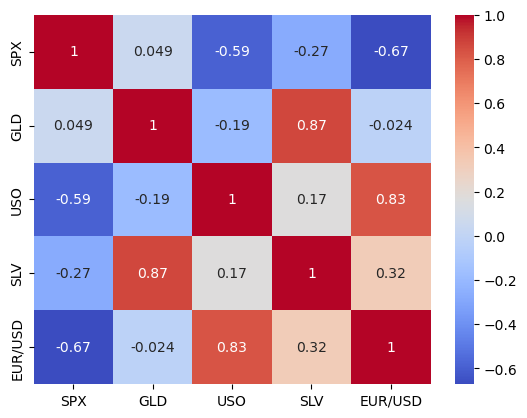

In [7]:
#vizualizing dataset(feature selection)
#heatmap(correlation map)               

cor=df.corr()                                                                                 
sns.heatmap(cor, annot=True,cmap='coolwarm') 

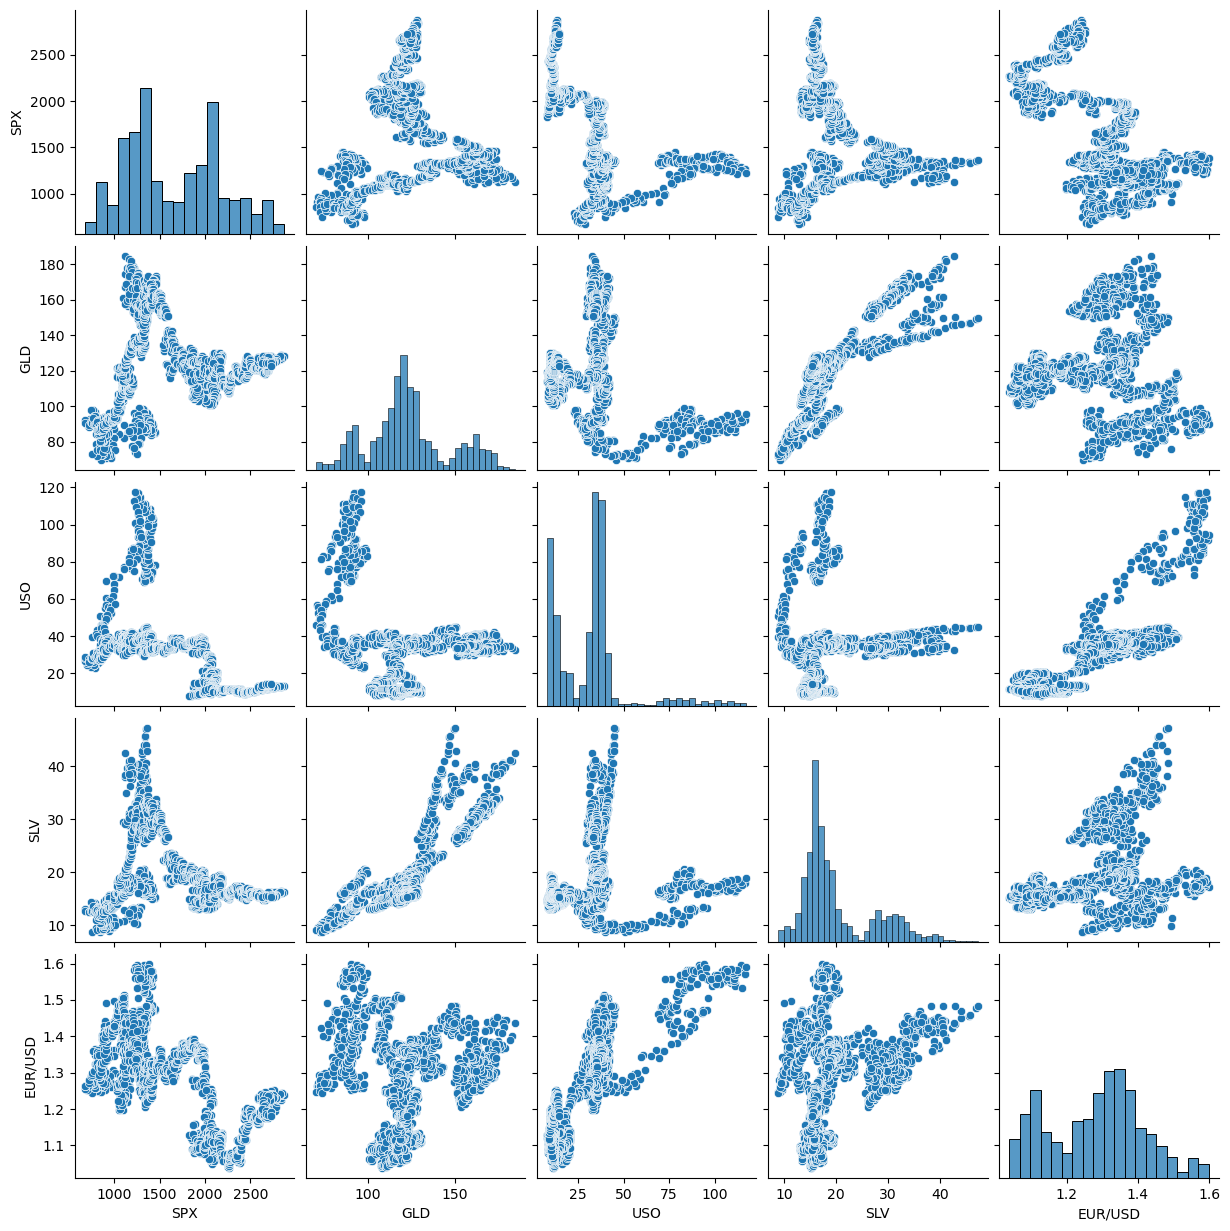

In [8]:
sns.pairplot(df)

<AxesSubplot:xlabel='GLD', ylabel='Density'>

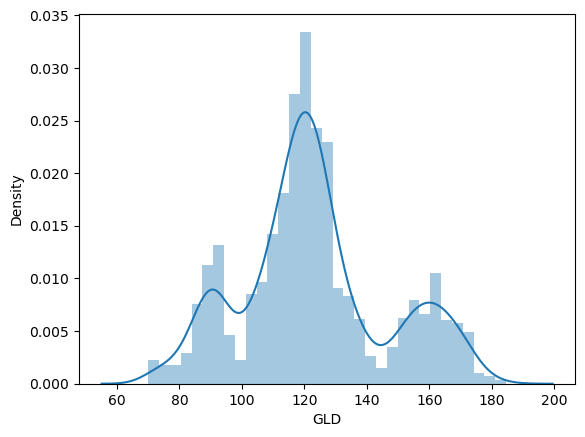

In [15]:
sns.distplot(df["GLD"]) 

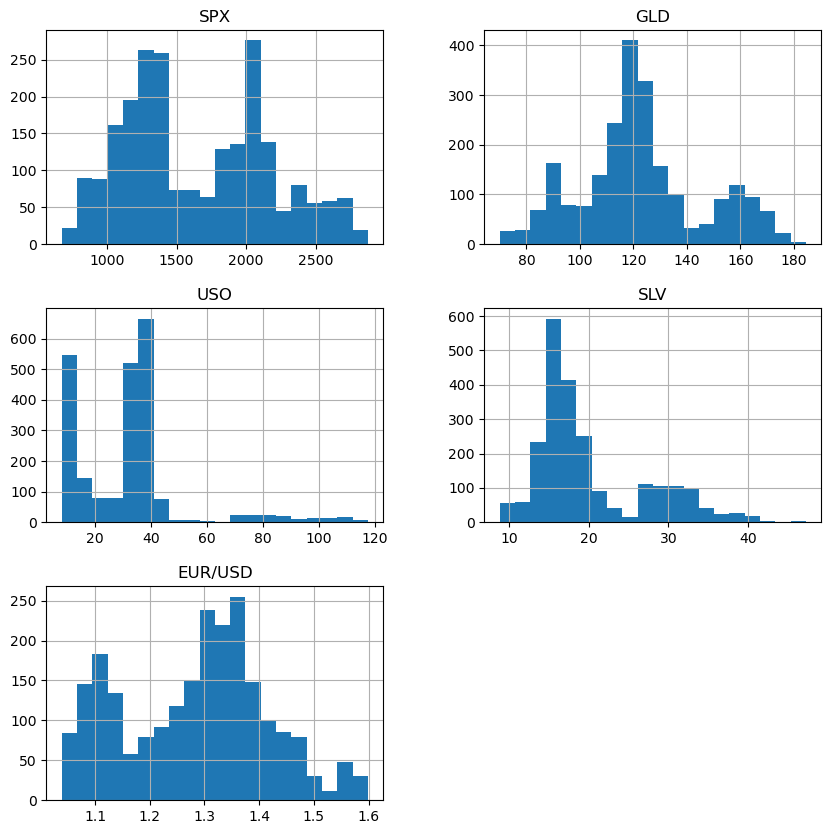

In [16]:
df.hist(bins=20, figsize=(10,10))              
plt.show() 

In [4]:
#DATA MODELING
from sklearn.model_selection import train_test_split    
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [5]:
y=df["GLD"]
x=df.drop(["Date","GLD"],axis=1)                        

In [6]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [7]:
### REGRESSION ALGORITHMS
from sklearn.ensemble import RandomForestRegressor    #1          
from xgboost import XGBRegressor                      #2
from sklearn.tree import DecisionTreeRegressor        #3
from sklearn.linear_model import LinearRegression     #4

In [29]:
#1.randomforestregressor
REGR = RandomForestRegressor()                
REGR.fit(xtrain,ytrain)                                             
PRED=REGR.predict(xtest)                                    

metrics.r2_score(ytest,PRED)         

0.9889035389431045

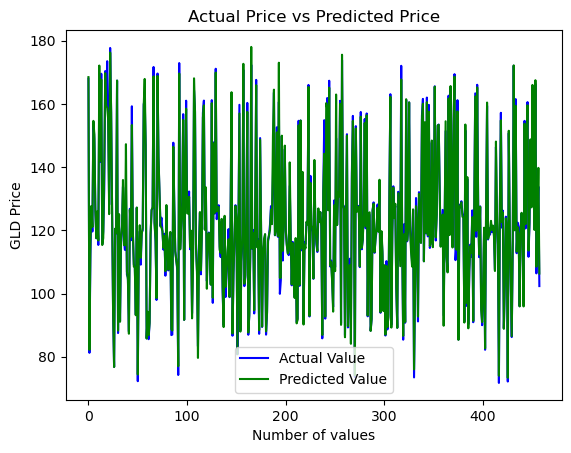

In [42]:
Y_TEST=list(ytest)

plt.plot(Y_TEST, color='blue', label = 'Actual Value')                        
plt.plot(PRED, color='green', label='Predicted Value')            

plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [44]:
#2.DecisionTreeRegressor        
DTR = DecisionTreeRegressor()
DTR.fit(xtrain,ytrain)                                             
PRED=DTR.predict(xtest)                                    

metrics.r2_score(ytest,PRED) 

0.9836323385115994

In [51]:
#3. Linear Regression
LRM = LinearRegression()                                                     
LRM.fit(xtrain, ytrain)         

LinearRegression()

In [52]:
LRM.coef_

array([ 6.82770004e-03, -2.56764053e-01,  3.17723486e+00, -8.99975261e+00])

In [53]:
LRM.intercept_

67.456292689762

In [54]:
LRM.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [56]:
lrmpred = LRM.predict(xtest)

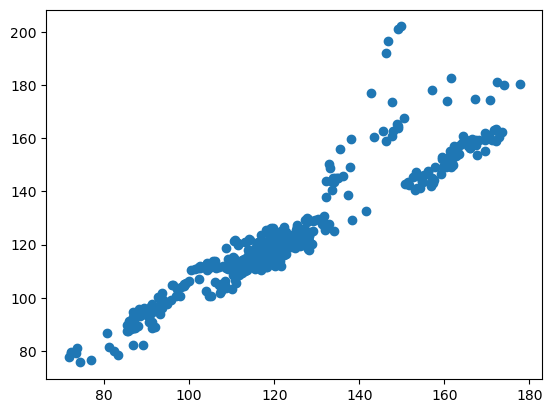

In [57]:
plt.scatter(ytest, lrmpred)

In [58]:
residuals = ytest-lrmpred

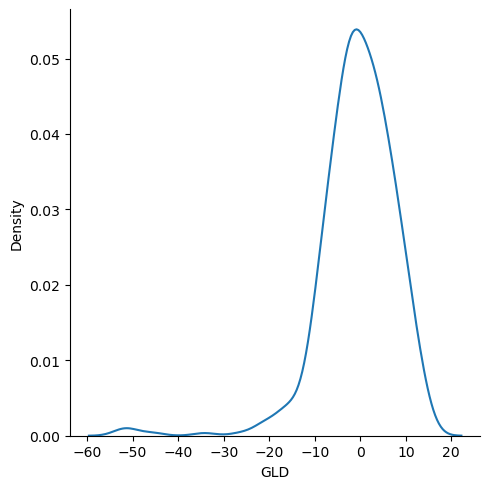

In [61]:
sns.displot(residuals, kind="kde")

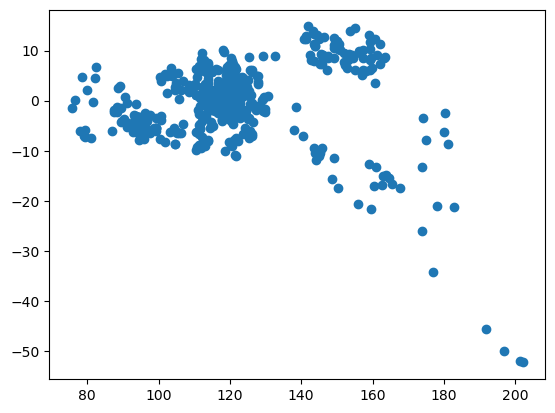

In [62]:
plt.scatter(lrmpred,residuals)

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(ytest,lrmpred))
print(mean_squared_error(ytest,lrmpred))
print(np.sqrt(mean_squared_error(ytest,lrmpred)))

5.911486735777763
70.78890079721529
8.41361401522647


In [65]:
from sklearn.metrics import r2_score
score=r2_score(ytest,lrmpred)
print(score)

0.8657886565869237


In [66]:
#display adjusted R-squared
1 - (1-score)*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1)

0.8646035674618635